In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as scln
from scipy.linalg import inv
from scipy.stats import multivariate_normal as mvn


In [0]:
def plot(r,r1):
  plt.figure(figsize=(7,7))
  plt.scatter(r[0,:],r[1,:],marker='+',label='class1',color='blue')
  plt.scatter(r1[0,:],r1[1,:],label='class2', marker = "^",color='green')
  plt.axis('equal')
  plt.title(' multi variate normal distribution curves of the  priors')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend(loc='upper left')
  plt.show()

In [0]:
def plot_lda(y1,y2,threshold):
  y_axis=[5 for x in range(200)]
  g_axis=[2 for x in range(200)]
  plt.axvline(x=threshold)
  plt.plot(y1,y_axis,'*')
  plt.plot(y2,g_axis,'o')
  plt.plot()

In [0]:
def multivariate_gaussian(mean,cov,sample):
  x=scln.cholesky(cov)
  Z=np.random.normal(loc=0, scale=1,size=(sample,cov.shape[0]))
  return (Z.dot(x)+mean)

In [0]:
def Error(check,p_err):
  plt.plot(check,p_err,color='red')
  plt.title(" error vs X")

In [0]:


mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[1,0],[0,1]])
sample=400
x=scln.cholesky(cov)

### generation of samples using question 1 data

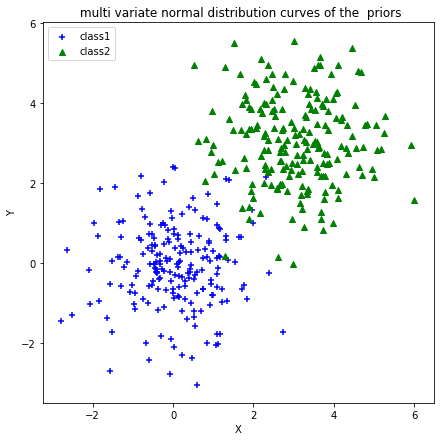

In [222]:
from scipy.stats import multivariate_normal as mvn
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[1,0],[0,1]])
sample=200
n1=200
n2=200
r= multivariate_gaussian(mu,cov,n1).T
r1=multivariate_gaussian(mu1,cov,n2).T
plot(r,r1)

In [197]:
r.shape

(2, 200)

### classification of samples part 1:

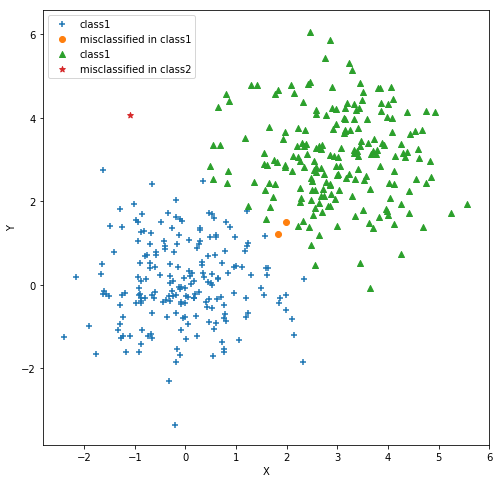

In [198]:
px1=0.5
px2=0.5
sigma=1
w1=mu.reshape(2,1)/(sigma)**2
w2=mu1.reshape(2,1)/(sigma)**2
w10=(-1/(2*(sigma)**2))*(mu.reshape(2,1).T)@(mu.reshape(2,1))+np.log(px1)
w20=-1/(2*(sigma)**2)*(mu1.reshape(2,1).T)@(mu1.reshape(2,1))+np.log(px2)
g11=w1.T@r+w10
g12=w1.T@r1+w10
g21=w2.T@r+w20
g22=w2.T@r1+w20
k=[]

for x in range(0,g11.shape[1]):
  if g11[0][x]>g21[0][x]:
    k.append("class1")  
  else:
    k.append("class2")   #storing all the class labels in an array k
      
l=[] 
for i in range(0,len(k)):
  if(k[i]=="class2"):
    l.append(r[:,i])
    
l1=[] 
for i in range(0,len(k)):
  if(k[i]=="class1"):
    l1.append(r[:,i])  
    
m=[]
for x in range(0,g11.shape[1]):
  if g22[0][x]>g12[0][x]:
    m.append("class1")  
  else:
    m.append("class2")
      
n=[] 
for i in range(0,len(k)):
  if(m[i]=="class2"):
    n.append(r1[:,i])
    
n1=[] 
for i in range(0,len(k)):
  if(m[i]=="class1"):
    n1.append(r1[:,i])
    
plt.figure(figsize=(8,8))    

plt.scatter(np.asarray(l1)[:,0],np.asarray(l1)[:,1],marker='+',label='class1')
plt.scatter(np.asarray(l)[:,0],np.asarray(l)[:,1],label='misclassified in class1')
plt.scatter(np.asarray(n1)[:,0],np.asarray(n1)[:,1],marker='^',label='class1')
plt.scatter(np.asarray(n)[:,0],np.asarray(n)[:,1],marker='*',label='misclassified in class2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

 

In [199]:
print ("number of samples generated from 1st distribution misclassified are {}".format(k.count("class2")))
print ("number of samples generated from 2nd distribution misclassified are {}".format(m.count("class2")))

number of samples generated from 1st distribution misclassified are 2
number of samples generated from 2nd distribution misclassified are 1


In [200]:
probability_error=k.count("class2")+m.count("class2")
probability_error/800

0.00375

### GENERATION OF SAMPLES PART 2

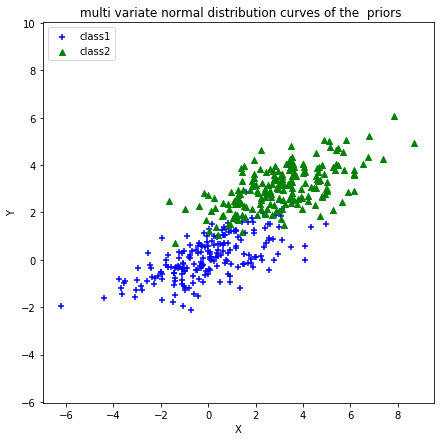

In [282]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[3,1],[1,0.8]])
sample=200
r= multivariate_gaussian(mu,cov,sample).T
r1=multivariate_gaussian(mu1,cov,sample).T
plot(r,r1)


### classification of samples part 2:

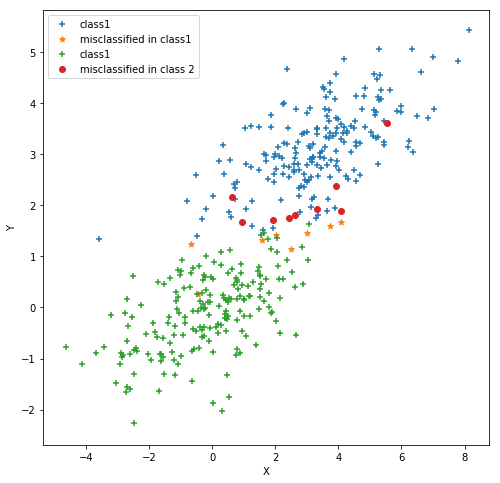

In [202]:
px1=0.5
px2=0.5
sigma=np.array([[3,1],[1,0.8]])
sigmainv=np.linalg.inv(sigma) 
w1=sigmainv@(mu.reshape(2,1))
w10=(-1/2)*(mu.reshape(2,1).T)@sigmainv@(mu.reshape(2,1))+np.log(px1)
w2=sigmainv@(mu1.reshape(2,1))
w20=(-1/2)*(mu1.reshape(2,1).T)@sigmainv@(mu1.reshape(2,1))+np.log(px2)
g11=w1.T@r+w10
g12=w1.T@r1+w10
g21=w2.T@r+w20
g22=w2.T@r1+w20

k=[]
for x in range(0,g11.shape[1]):
  if g11[0][x]>g21[0][x]:
    k.append("class1")  
  else:
    k.append("class2")
      
l=[] 
for i in range(0,len(k)):
  if(k[i]=="class2"):
    l.append(r[:,i])
    
l1=[] 
for i in range(0,len(k)):
  if(k[i]=="class1"):
    l1.append(r[:,i])

    
m=[]
for x in range(0,g11.shape[1]):
  if g22[0][x]>g12[0][x]:
    m.append("class1")  
  else:
    m.append("class2")
      
n=[] 
for i in range(0,len(k)):
  if(m[i]=="class2"):
    n.append(r1[:,i])
    
n1=[] 
for i in range(0,len(k)):
  if(m[i]=="class1"):
    n1.append(r1[:,i])
    
plt.figure(figsize=(8,8))    
plt.scatter(np.asarray(n1)[:,0],np.asarray(n1)[:,1],marker='+',label='class1')
plt.scatter(np.asarray(n)[:,0],np.asarray(n)[:,1],marker='*',label='misclassified in class1')        
plt.scatter(np.asarray(l1)[:,0],np.asarray(l1)[:,1],marker='+',label='class1')
plt.scatter(np.asarray(l)[:,0],np.asarray(l)[:,1],label='misclassified in class 2')    
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()


In [203]:
print ("number of samples generated from 1st distribution misclassified are {}".format(k.count("class2")))
print ("number of samples generated from 2nd distribution misclassified are {}".format(m.count("class2")))

number of samples generated from 1st distribution misclassified are 9
number of samples generated from 2nd distribution misclassified are 8


In [204]:
probability_error=k.count("class2")+m.count("class2")
probability_error/400

0.0425

### GENERATION OF SAMPLES PART 3

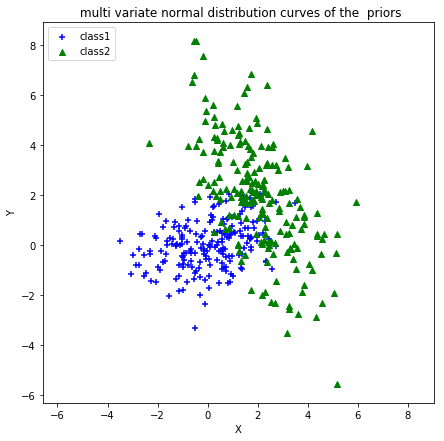

In [205]:
mu2=np.array([0,0])
mu3=np.array([2,2])
cov1=np.array([[2,0.5],[0.5,1]])
cov2=np.array([[2,-1.9],[-1.9,5]])
sample=200
r=multivariate_gaussian(mu2,cov1,sample).T
r1=multivariate_gaussian(mu3,cov2,sample).T
plot(r,r1)

### classification of samples according to the data given in part3

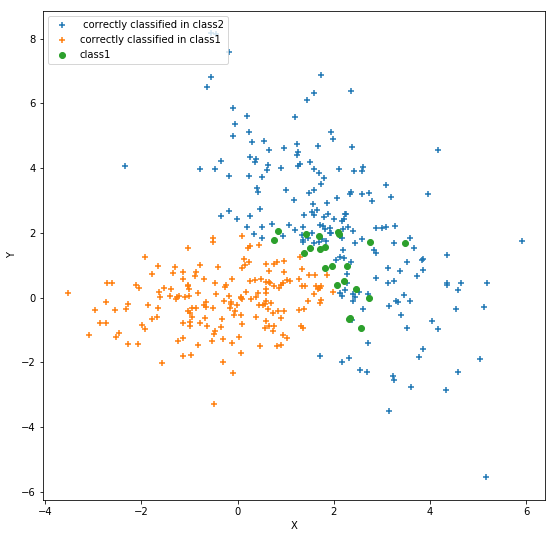

In [206]:
px1=0.5
px2=0.5
sigma1=np.array([[2,0.5],[0.5,1]])
sigmainv1=np.linalg.inv(sigma1)
sigma2=np.array([[2,-1.9],[-1.9,5]])
sigmainv2=np.linalg.inv(sigma2)
W1=(-1/2)*sigmainv1
w1=sigmainv1@(mu2.reshape(2,1))
w10=(-1/2)*(mu2.reshape(2,1).T)@sigmainv1@mu2.reshape(2,1)-0.5*np.log(np.linalg.det(sigma1))+np.log(px1)
W2=-0.5*sigmainv2
w2=sigmainv2@(mu3.reshape(2,1))
w20=(-1/2)*(mu3.reshape(2,1).T)@sigmainv2@mu3.reshape(2,1)-0.5*np.log(np.linalg.det(sigma2))+np.log(px2)
g11=np.diag(r.T@W1@r)+w1.T@r+w10
g12=np.diag(r1.T@W1@r1)+w1.T@r1+w10
g22=np.diag(r1.T@W2@r1)+w2.T@r1+w20
g21=np.diag(r.T@W2@r)+w2.T@r+w20


k=[]
for x in range(0,g11.shape[1]):
  if g11[0][x]>g21[0][x]:
    k.append("class1")  
  else:
    k.append("class2")
      
l=[] 
for i in range(0,len(k)):
  if(k[i]=="class2"):
    l.append(r[:,i])
    
l1=[] 
for i in range(0,len(k)):
  if(k[i]=="class1"):
    l1.append(r[:,i])

    
    
m=[]
for x in range(0,g22.shape[1]):
  if g22[0][x]>g12[0][x]:
    m.append("class1")  
  else:
    m.append("class2")
      
n=[] 
for i in range(0,len(m)):
  if(m[i]=="class2"):
    n.append(r1[:,i])
    
n1=[] 
for i in range(0,len(m)):
  if(m[i]=="class1"):
    n1.append(r1[:,i])
    
    
plt.figure(figsize=(9,9))    
plt.scatter(np.asarray(n1)[:,0],np.asarray(n1)[:,1],marker='+',label=' correctly classified in class2')
#plt.scatter(np.asarray(n)[:,0],np.asarray(n)[:,1],label='misclassied in class2')      
plt.scatter(np.asarray(l1)[:,0],np.asarray(l1)[:,1],marker='+',label='correctly classified in class1')
plt.scatter(np.asarray(l)[:,0],np.asarray(l)[:,1],label='class1') 
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()


In [207]:
print ("number of samples generated from 1st distribution misclassified are {}".format(k.count("class2")))
print ("number of samples generated from 2nd distribution misclassified are {}".format(m.count("class2")))

number of samples generated from 1st distribution misclassified are 22
number of samples generated from 2nd distribution misclassified are 15


In [208]:
probability_error=k.count("class2")+m.count("class2")
probability_error/400

0.0925

### PART 4: CLASSIFICATION OF SAMPLES USING DATA GIVEN IN THE QUESTION 1 WITH DIFFERENT PRIORS

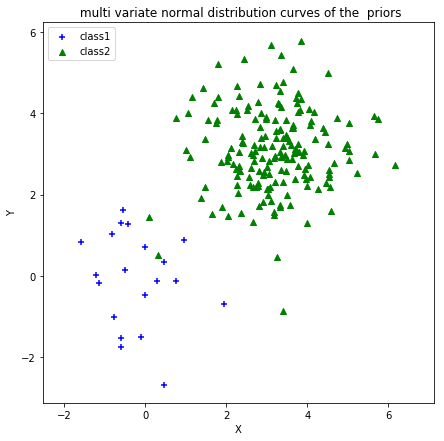

In [209]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[1,0],[0,1]])
n1=20
n2=180
r= multivariate_gaussian(mu,cov,n1).T
r1=multivariate_gaussian(mu1,cov,n2).T
plot(r,r1)

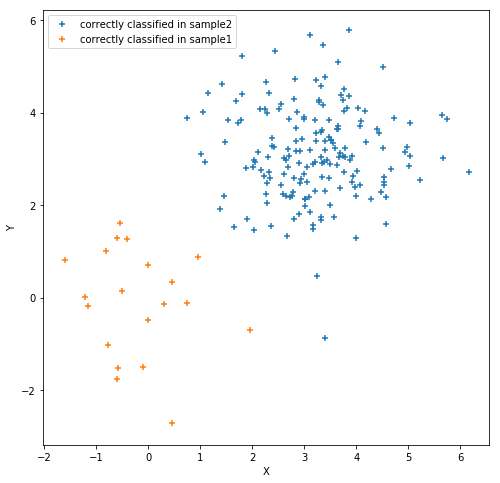

In [212]:
px1=0.05
px2=0.95
sigma=1
w1=mu.reshape(2,1)/(sigma)**2
w2=mu1.reshape(2,1)/(sigma)**2
w10=(-1/(2*(sigma)**2))*(mu.reshape(2,1).T)@(mu.reshape(2,1))+np.log(px1)
w20=-1/(2*(sigma)**2)*(mu1.reshape(2,1).T)@(mu1.reshape(2,1))+np.log(px2)
g11=w1.T@r+w10
g12=w1.T@r1+w10
g21=w2.T@r+w20
g22=w2.T@r1+w20



k=[]
for x in range(0,g11.shape[1]):
  if g11[0][x]>g21[0][x]:
    k.append("class1")  
  else:
    k.append("class2")
      
l=[] 
for i in range(0,len(k)):
  if(k[i]=="class2"):
    l.append(r[:,i])
    
l1=[] 
for i in range(0,len(k)):
  if(k[i]=="class1"):
    l1.append(r[:,i])
    
m=[]
for x in range(0,g22.shape[1]):
  if g22[0][x]>g12[0][x]:
    m.append("class1")  
  else:
    m.append("class2")
      
n=[] 
for i in range(0,len(m)):
  if(m[i]=="class2"):
    n.append(r1[:,i])
    
n1=[] 
for i in range(0,len(m)):
  if(m[i]=="class1"):
    n1.append(r1[:,i])
plt.figure(figsize=(8,8))    
plt.scatter(np.asarray(n1)[:,0],np.asarray(n1)[:,1],marker='+',label='correctly classified in sample2')
#plt.scatter(np.asarray(n)[:,0],np.asarray(n)[:,1],marker='*',label='class2')      
plt.scatter(np.asarray(l1)[:,0],np.asarray(l1)[:,1],marker='+',label='correctly classified in sample1')
#plt.scatter(np.asarray(l)[:,0],np.asarray(l)[:,1],label='class2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()


In [213]:
print ("number of samples generated from 1st distribution misclassified are {}".format(k.count("class2")))
print ("number of samples generated from 2nd distribution misclassified are {}".format(m.count("class2")))

number of samples generated from 1st distribution misclassified are 0
number of samples generated from 2nd distribution misclassified are 2


In [214]:
probability_error=k.count("class2")+m.count("class2")
probability_error/400


0.005

### PART 5: CLASSIFICATION OF SAMPLES USING DATA GIVEN IN THE QUESTION  2WITH DIFFERENT PRIORS

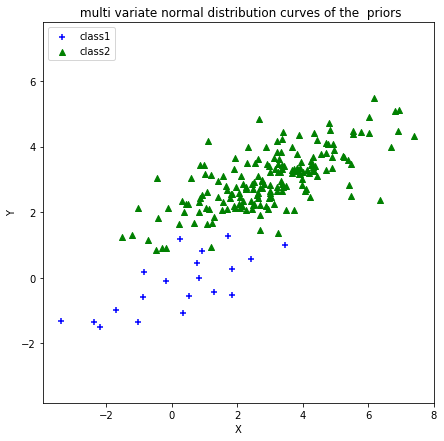

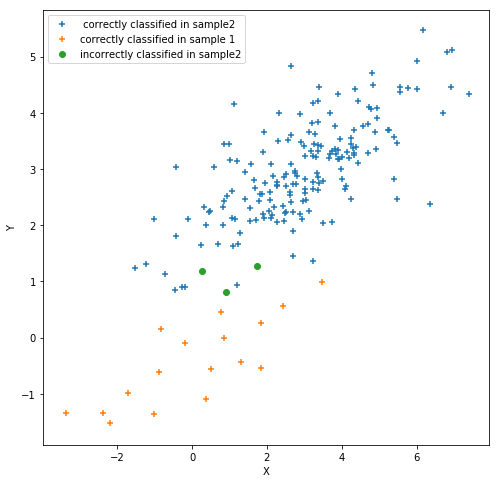

In [215]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[3,1],[1,0.8]])
n1=20
n2=180
r= multivariate_gaussian(mu,cov,n1).T
r1=multivariate_gaussian(mu1,cov,n2).T
plot(r,r1)



px1=0.05
px2=0.95
sigma=np.array([[3,1],[1,0.8]])
sigmainv=np.linalg.inv(sigma) 
w1=sigmainv@(mu.reshape(2,1))
w10=(-1/2)*(mu.reshape(2,1).T)@sigmainv@(mu.reshape(2,1))+np.log(px1)
w2=sigmainv@(mu1.reshape(2,1))
w20=(-1/2)*(mu1.reshape(2,1).T)@sigmainv@(mu1.reshape(2,1))+np.log(px2)
g11=w1.T@r+w10
g12=w1.T@r1+w10
g21=w2.T@r+w20
g22=w2.T@r1+w20

k=[]
for x in range(0,g11.shape[1]):
  if g11[0][x]>g21[0][x]:
    k.append("class1")  
  else:
    k.append("class2")
      
l=[] 
for i in range(0,len(k)):
  if(k[i]=="class2"):
    l.append(r[:,i])
    
l1=[] 
for i in range(0,len(k)):
  if(k[i]=="class1"):
    l1.append(r[:,i])

m=[]
for x in range(0,g22.shape[1]):
  if g22[0][x]>g12[0][x]:
    m.append("class1")  
  else:
    m.append("class2")
      
n=[] 
for i in range(0,len(m)):
  if(m[i]=="class2"):
    n.append(r1[:,i])
    
n1=[] 
for i in range(0,len(m)):
  if(m[i]=="class1"):
    n1.append(r1[:,i])
    
plt.figure(figsize=(8,8))    
plt.scatter(np.asarray(n1)[:,0],np.asarray(n1)[:,1],marker='+',label=' correctly classified in sample2')
#plt.scatter(np.asarray(n)[:,0],np.asarray(n)[:,1],marker='*',label='class2')       
plt.scatter(np.asarray(l1)[:,0],np.asarray(l1)[:,1],marker='+',label='correctly classified in sample 1')
plt.scatter(np.asarray(l)[:,0],np.asarray(l)[:,1],label='incorrectly classified in sample2') 
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()



In [216]:
print ("number of samples generated from 1st distribution misclassified are {}".format(k.count("class2")))
print ("number of samples generated from 2nd distribution misclassified are {}".format(m.count("class2")))

number of samples generated from 1st distribution misclassified are 3
number of samples generated from 2nd distribution misclassified are 0


In [217]:
len(n)

0

### PART 6: CLASSIFICATION OF SAMPLES USING DATA GIVEN IN THE QUESTION 3 WITH DIFFERENT PRIORS

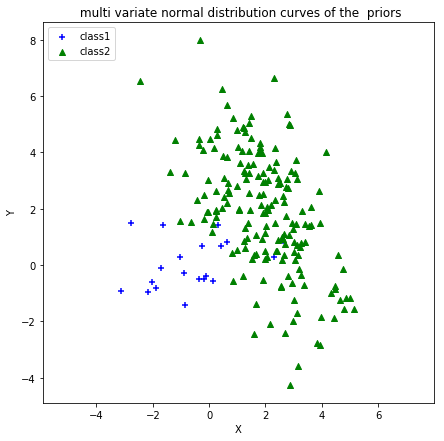

In [304]:
mu2=np.array([0,0])
mu3=np.array([2,2])
cov1=np.array([[2,0.5],[0.5,1]])
cov2=np.array([[2,-1.9],[-1.9,5]])
sample1=20
sample2=180
r=multivariate_gaussian(mu2,cov1,sample1).T
r1=multivariate_gaussian(mu3,cov2,sample2).T
plot(r,r1)


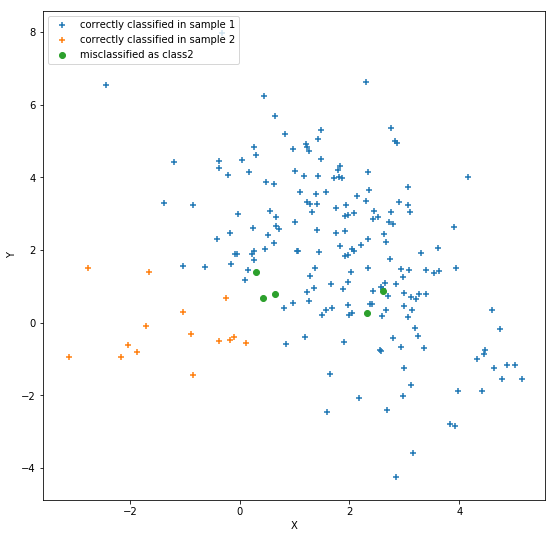

In [305]:
px1=0.05
px2=0.95


sigma1=np.array([[2,0.5],[0.5,1]])
sigmainv1=np.linalg.inv(sigma1)
sigma2=np.array([[2,-1.9],[-1.9,5]])
sigmainv2=np.linalg.inv(sigma2)
W1=(-1/2)*sigmainv1
w1=sigmainv1@(mu2.reshape(2,1))
w10=(-1/2)*(mu2.reshape(2,1).T)@sigmainv1@mu2.reshape(2,1)-0.5*np.log(np.linalg.det(sigma1))+np.log(px1)
W2=-0.5*sigmainv2
w2=sigmainv2@(mu3.reshape(2,1))
w20=(-1/2)*(mu3.reshape(2,1).T)@sigmainv2@mu3.reshape(2,1)-0.5*np.log(np.linalg.det(sigma2))+np.log(px2)
g11=np.diag(r.T@W1@r)+w1.T@r+w10
g12=np.diag(r1.T@W1@r1)+w1.T@r1+w10
g22=np.diag(r1.T@W2@r1)+w2.T@r1+w20
g21=np.diag(r.T@W2@r)+w2.T@r+w20


k=[]
for x in range(0,g11.shape[1]):
  if g11[0][x]>g21[0][x]:
    k.append("class1")  
  else:
    k.append("class2")
      
l=[] 
for i in range(0,len(k)):
  if(k[i]=="class2"):
    l.append(r[:,i])
    
l1=[] 
for i in range(0,len(k)):
  if(k[i]=="class1"):
    l1.append(r[:,i])
    
    
m=[]
for x in range(0,g22.shape[1]):
  if g22[0][x]>g12[0][x]:
    m.append("class1")  
  else:
    m.append("class2")
      
n=[] 
for i in range(0,len(m)):
  if(m[i]=="class2"):
    n.append(r1[:,i])
    
n1=[] 
for i in range(0,len(m)):
  if(m[i]=="class1"):
    n1.append(r1[:,i])
    
plt.figure(figsize=(9,9))    
plt.scatter(np.asarray(n1)[:,0],np.asarray(n1)[:,1],marker='+',label='correctly classified in sample 1')
#plt.scatter(np.asarray(n)[:,0],np.asarray(n)[:,1],label='class2')      
plt.scatter(np.asarray(l1)[:,0],np.asarray(l1)[:,1],marker='+',label='correctly classified in sample 2')
plt.scatter(np.asarray(l)[:,0],np.asarray(l)[:,1],label='misclassified as class2') 
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()



In [306]:
print ("number of samples generated from 1st distribution misclassified are {}".format(k.count("class2")))
print ("number of samples generated from 2nd distribution misclassified are {}".format(m.count("class2")))

number of samples generated from 1st distribution misclassified are 5
number of samples generated from 2nd distribution misclassified are 0


### QUESTION 3 LDA and generation 

In [0]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[1,0],[0,1]])
sample=200
n1=200
n2=200
r= multivariate_gaussian(mu,cov,n1).T
r1=multivariate_gaussian(mu1,cov,n2).T


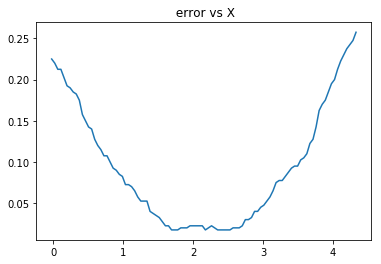

In [224]:
mean1=np.array([np.mean(r[0,:].T),np.mean(r[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r)*0.5)+(np.cov(r1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r
y2=w.T@r1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
  

Error(check,p_err)


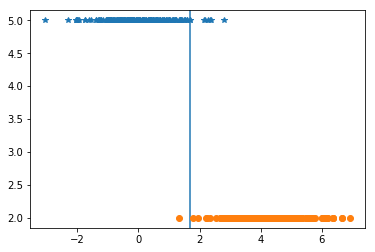

In [225]:
i=np.argmin(np.array(p_err)) 
threshold=check[i] # minimum threshold values
plot_lda(y1,y2,threshold)

# Question 3.2 LDA


In [0]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[3,1],[1,0.8]])
sample=200
r= multivariate_gaussian(mu,cov,sample).T
r1=multivariate_gaussian(mu1,cov,sample).T

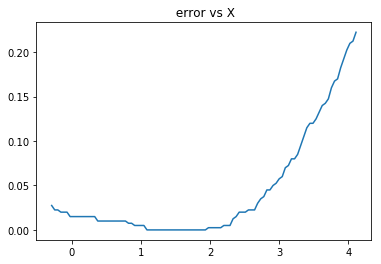

In [331]:


mean1=np.array([np.mean(r[0,:].T),np.mean(r[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r)*0.5)+(np.cov(r1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r
y2=w.T@r1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
Error(check,p_err)




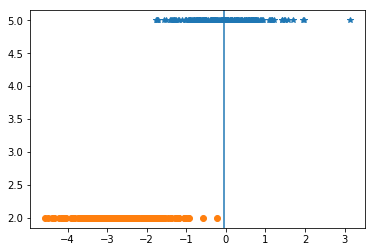

In [239]:
i=np.argmin(np.array(p_err)) 
threshold=check[i] # minimum threshold values
plot_lda(y1,y2,threshold)

# Question 3.3 LDA

In [0]:
mu2=np.array([0,0])
mu3=np.array([2,2])
cov1=np.array([[2,0.5],[0.5,1]])
cov2=np.array([[2,-1.9],[-1.9,5]])
sample=200
r=multivariate_gaussian(mu2,cov1,sample).T
r1=multivariate_gaussian(mu3,cov2,sample).T

In [0]:
mean1=np.array([np.mean(r[0,:].T),np.mean(r[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r)*0.5)+(np.cov(r1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r
y2=w.T@r1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
  



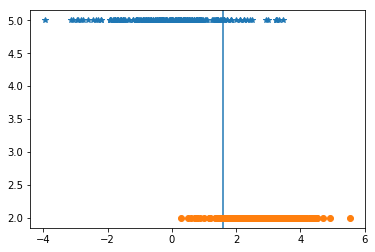

In [0]:
i=np.argmin(np.array(p_err)) 
threshold=check[i] # minimum threshold values
plot_lda(y1,y2,threshold)

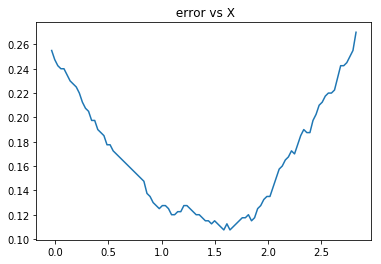

In [0]:
Error(check,p_err)

### question 4 3.4 LDA

In [0]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[1,0],[0,1]])
n1=20
n2=180
r= multivariate_gaussian(mu,cov,n1).T
r1=multivariate_gaussian(mu1,cov,n2).T

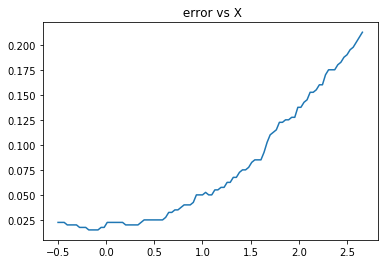

In [307]:
mean1=np.array([np.mean(r[0,:].T),np.mean(r[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r)*0.5)+(np.cov(r1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r
y2=w.T@r1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
  
Error(check,p_err)

### 3.6 LDA

In [0]:
mu2=np.array([0,0])
mu3=np.array([2,2])
cov1=np.array([[2,0.5],[0.5,1]])
cov2=np.array([[2,-1.9],[-1.9,5]])
sample1=20
sample2=180
r=multivariate_gaussian(mu2,cov1,sample1).T
r1=multivariate_gaussian(mu3,cov2,sample2).T

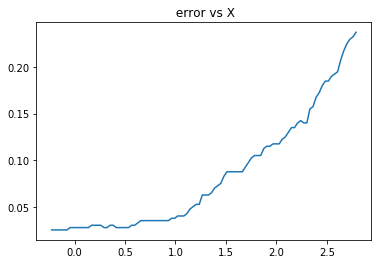

In [317]:
mean1=np.array([np.mean(r[0,:].T),np.mean(r[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r)*0.5)+(np.cov(r1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r
y2=w.T@r1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
  
Error(check,p_err)

### 3.5 LDA

In [0]:
mu=np.array([0,0])
mu1=np.array([3,3])
cov=np.array([[3,1],[1,0.8]])
n1=20
n2=180
r= multivariate_gaussian(mu,cov,n1).T
r1=multivariate_gaussian(mu1,cov,n2).T
plot(r,r1)


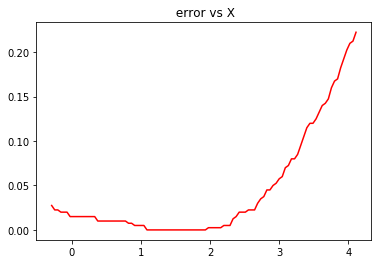

In [342]:
mean1=np.array([np.mean(r[0,:].T),np.mean(r[1,:].T)])
mean1=mean1.reshape(-1,1)
mean2=np.array([np.mean(r1[0,:].T),np.mean(r1[1,:].T)])
mean2=mean2.reshape(-1,1)
s_b=(mean1-mean2)@(mean1-mean2).T
#rom sklearn.covariance import empirical_covariance as ecov
s_w=(np.cov(r)*0.5)+(np.cov(r1)*0.5)
h=inv(s_w)@s_b
w,v=np.linalg.eig(h)
w=v[:,np.argmax(np.array(w))]
y1=w.T@r
y2=w.T@r1
y1.mean(),y2.mean()
minx=y1.mean() if y1.mean()<= y2.mean() else y2.mean()
maxx=y1.mean() if y1.mean()>= y2.mean() else y2.mean()
check=np.linspace(minx,maxx,100)
p_err=[]
y1=np.array(y1)
y2=np.array(y2)
for i in (check):
  l1_1=y1[y1<=i]
  l1_2=y1[y1>i]
  l2_2=y2[y2>=i]
  l2_1=y2[y2<i]
  p_err.append((len(l1_2)+len(l2_1))/400)
  
Error(check,p_err)